<a href="https://colab.research.google.com/github/ks-chauhan/ML-Learning-and-basics-with-PyTorch/blob/main/FashionMNIST_convolutional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from tqdm.auto import tqdm
from timeit import default_timer
import matplotlib.pyplot as plt

In [2]:
class FashionMNISTconvV0(nn.Module):
  def __init__(self,
               input_size:int,
               hidden_units:int,
               output_size:int):
    super().__init__()
    self.convoltuional_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_size,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.convoltuional_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_size)
    )
  def forward(self,x:torch.Tensor):
    x=self.convoltuional_block1(x)
    x=self.convoltuional_block2(x)
    X=self.classifier(x)
    return X

In [3]:
Train_Data=datasets.FashionMNIST(train=True,
                                 download=True,
                                 root="data",
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None)
Test_Data=datasets.FashionMNIST(train=False,
                                 download=True,
                                 root="data",
                                 transform=torchvision.transforms.ToTensor(),
                                target_transform=None)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.10MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 159kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.91MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
device="cuda" if (torch.cuda.is_available()) else "cpu"

In [5]:
Classes=Train_Data.classes
class_names=len(Classes)
Classes[5]

'Sandal'

In [6]:
model_0=FashionMNISTconvV0(input_size=1,
                           hidden_units=10,
                           output_size=class_names).to(device)

In [7]:
Train_Data_Loader=torch.utils.data.DataLoader(Train_Data,
                                              batch_size=32,
                                              shuffle=True)
Test_Data_Loader=torch.utils.data.DataLoader(Test_Data,
                                              batch_size=32,
                                              shuffle=True)

In [8]:
Train_Data_Loader

In [9]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.05)

In [10]:
torch.manual_seed(18)
torch.cuda.manual_seed(18)
epochs=3
start_time_training=default_timer()
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(Train_Data_Loader):
    X,y=X.to(device),y.to(device)
    model_0.train()
    pred=model_0(X)
    loss=loss_fn(pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(Train_Data_Loader)
  print(f"current loss = {train_loss}")
end_time_training=default_timer()
print(f"time taken for this loop : {end_time_training-start_time_training}")

  0%|          | 0/3 [00:00<?, ?it/s]

current loss = 0.66867995262146
current loss = 0.37378454208374023
current loss = 0.32702234387397766
time taken for this loop : 37.410486270999996


In [11]:
len(Train_Data_Loader)

1875

In [12]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [13]:
from torchmetrics.classification import Accuracy
Accuracy_metric=Accuracy(task="multiclass",num_classes=10).to(device)
test_loss,test_accuracy=0,0
model_0.eval()
with torch.inference_mode():
  for batch,(X_test,y_test) in enumerate(Test_Data_Loader):
    X_test,y_test=X_test.to(device),y_test.to(device)
    test_pred=model_0(X_test)
    test_loss+=loss_fn(test_pred,y_test)
    accu=Accuracy_metric((test_pred),y_test)
    test_accuracy+=accu.item()
  test_accuracy/=len(Test_Data_Loader)
  test_loss/=len(Test_Data_Loader)
  print(f"test accuracy : {test_accuracy} test loss : {test_loss}")

test accuracy : 0.8868809904153354 test loss : 0.32075393199920654


In [14]:
List_Train_Data=list(Train_Data)

In [15]:
type(List_Train_Data)

list

In [16]:
def random_predictions(model:torch.nn.Module,
                       Data:list,
                       Device):
  model.to(Device)
  pred_list=[]
  model.eval()
  for sample in Data:
    sample=torch.unsqueeze(sample,dim=0).to(Device)
    pred_logits=model(sample)
    pred=torch.softmax(pred_logits.squeeze(),dim=0)
    pred=torch.tensor(pred.squeeze())
    print(pred)
    pred=torch.argmax(pred,dim=0).item()
    pred_list.append(pred)
  return pred_list

In [17]:
images,labels=List_Train_Data[0]

In [18]:
import random
image_list=[]
actual_label_list=[]
for image,label in random.sample(list(Test_Data),k=9):
  image.to(device)
  image_list.append(image)
  actual_label_list.append(label)


Text(0.5, 1.0, 'Bag')

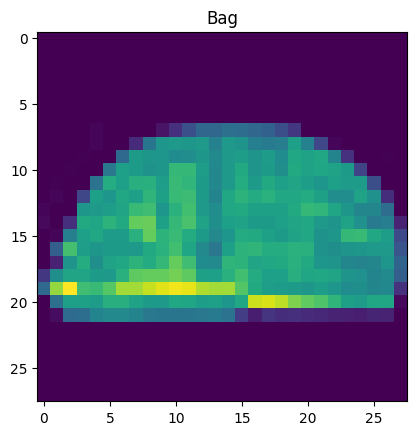

In [19]:

plt.imshow(image_list[0].squeeze())
plt.title(Classes[(actual_label_list[0])])

In [20]:
Predicted_label_list=random_predictions(model=model_0,
                                        Data=image_list,
                                        Device=device)

<ipython-input-16-c6f21b2db507>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred=torch.tensor(pred.squeeze())


tensor([7.7957e-03, 4.4396e-04, 2.9051e-03, 1.8447e-03, 7.0202e-03, 8.8750e-03,
        1.3475e-02, 3.4775e-02, 9.2022e-01, 2.6439e-03], device='cuda:0')
tensor([1.6215e-01, 4.5677e-02, 8.1794e-02, 4.0351e-01, 3.6227e-02, 3.5212e-04,
        2.4362e-01, 1.0522e-03, 2.5337e-02, 2.7826e-04], device='cuda:0')
tensor([3.8553e-01, 1.8271e-06, 1.0011e-02, 1.0584e-02, 5.5247e-03, 3.2627e-08,
        5.8538e-01, 3.5695e-07, 2.9632e-03, 3.4298e-06], device='cuda:0')
tensor([1.5879e-04, 1.1076e-05, 6.2919e-02, 3.7701e-06, 8.4732e-01, 1.3280e-06,
        8.8915e-02, 1.2207e-08, 6.0493e-04, 6.6550e-05], device='cuda:0')
tensor([2.8802e-04, 9.9433e-01, 9.7922e-05, 4.0224e-03, 1.0089e-03, 6.7081e-06,
        2.0278e-04, 1.3063e-05, 1.4295e-05, 1.6318e-05], device='cuda:0')
tensor([8.9122e-05, 9.9750e-01, 2.3462e-06, 2.2892e-03, 6.7646e-05, 7.8526e-07,
        4.3511e-05, 4.9671e-06, 1.1666e-06, 3.2128e-06], device='cuda:0')
tensor([1.4313e-02, 1.5254e-03, 1.1870e-02, 5.0161e-03, 5.1847e-03, 1.3722e-

In [21]:
Predicted_label_list

[8, 3, 6, 4, 1, 1, 8, 1, 6]

In [22]:
actual_label_list

[8, 6, 0, 4, 1, 1, 8, 1, 6]

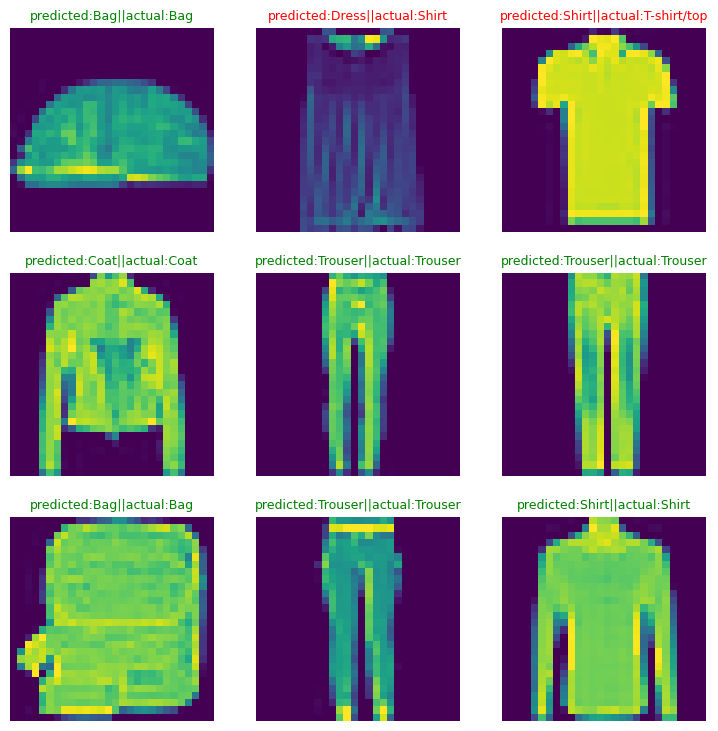

In [23]:
plt.figure(figsize=(9,9))
no_rows=3
no_columns=3
for i,sample in enumerate(image_list):
  plt.subplot(no_rows,no_columns,i+1)
  plt.imshow(sample.squeeze())
  predicted_title=Classes[Predicted_label_list[i]]
  actual_title=Classes[actual_label_list[i]]
  title_text=(f"predicted:{predicted_title}||actual:{actual_title}")
  if(predicted_title==actual_title):
    plt.title(title_text,c="g",fontsize="9")
  else:
    plt.title(title_text,c="r",fontsize="9")
  plt.axis(False)

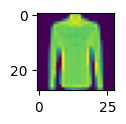

In [24]:
plt.figure(figsize=(1,1))
plt.imshow(image.squeeze())

In [25]:
import mlxtend

In [26]:
mlxtend.__version__

'0.23.4'

In [27]:
prediction_labels=[]
model_0.eval()
with torch.inference_mode():
  for image,label in Test_Data:
    image=image.to(device)
    prediction_label=model_0(image.unsqueeze(0))
    prediction_label=torch.softmax(prediction_label,dim=1)
    prediction_labels.append(prediction_label.argmax(dim=1).item())

In [32]:
prediction_labels[:10]
pred_label_tensor=torch.tensor(prediction_labels)

In [33]:
pred_label_tensor

tensor([9, 2, 1,  ..., 8, 1, 5])

In [29]:
len(prediction_labels)

10000

In [30]:
Test_Data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [31]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [35]:
class_name

10

In [40]:
conf_matrix=ConfusionMatrix(task="multiclass",
                            num_classes=len(Classes))
conf_tensor=conf_matrix(preds=pred_label_tensor,
                 target=Test_Data.targets)

In [41]:
conf_tensor

tensor([[828,   1,  24,  32,   5,   1,  93,   0,  16,   0],
        [  0, 972,   0,  23,   3,   0,   0,   0,   2,   0],
        [ 10,   0, 872,  10,  68,   0,  37,   0,   3,   0],
        [ 16,   5,  18, 902,  28,   0,  28,   0,   3,   0],
        [  0,   0, 101,  38, 796,   0,  64,   0,   1,   0],
        [  0,   0,   0,   0,   0, 968,   0,  14,   1,  17],
        [133,   1,  99,  32,  82,   0, 640,   0,  13,   0],
        [  0,   0,   0,   0,   0,  12,   0, 945,   0,  43],
        [  1,   1,   5,   7,   3,   2,   4,   2, 973,   2],
        [  0,   0,   1,   0,   0,   3,   1,  23,   0, 972]])

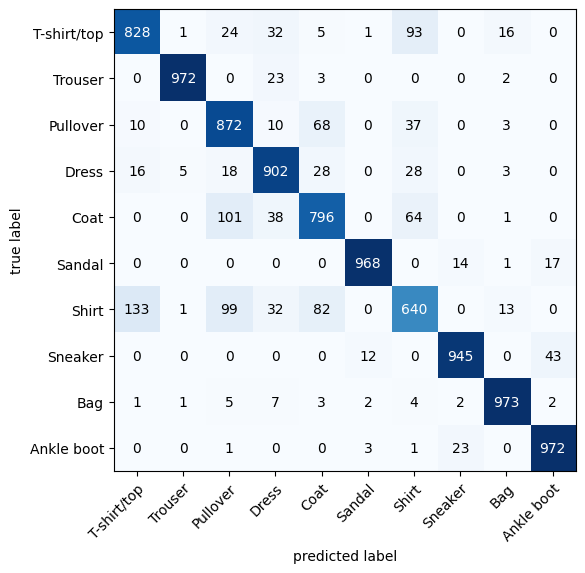

In [48]:
fig,ax=plot_confusion_matrix(
    conf_mat=conf_tensor.numpy(),
    class_names=Classes,
    figsize=(10,6)
)

In [51]:
from pathlib import Path
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "torchvision_FashionMNIST_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/torchvision_FashionMNIST_model_1.pth


In [55]:
model_1=FashionMNISTconvV0(input_size=1,
                           hidden_units=10,
                           output_size=len(Classes))
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-55-77fe4df5b970>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>